# Lecture 17: Structured matrices, FFT, convolutions, Toeplitz matrices

## Previous lecture

- Krylov methods: Arnoldi relation, CG, GMRES
- Preconditioners 
    - Jacobi
    - Gauss-Seidel
    - SSOR
    - ILU and its modifications

## Other structured matrices

- Up to now, we discussed preconditioning only for **sparse matrices**
- But iterative methods work well for any matrices that have fast black-box matrix-by-vector product
- Important class of such matrices are **Toeplitz matrices** (and **Hankel matrices**) and their **multilevel** variants

They are directly connected to the **convolution** operation and **Fast Fourier Transform**.

## Convolution 

- One of the key operation in signal processing/machine learning is the **convolution of two functions**.

- Let $x(t)$ and $y(t)$ be two given functions. Their convolution is defined as

$$(x * y)(t) = \int_{-\infty}^{\infty} x(\tau) y(t -  \tau) d \tau.$$

## Convolution theorem and Fourier transform

A well-known fact: a *convolution* in the **time domain** is a *product* in the **frequency domain**. 

- Time-frequency transformation is given by the **Fourier transform**:

$$\widehat{x}(w) = (\mathcal{F}(x))(w) = \int_{-\infty}^{\infty} e^{i w t} x(t) dt.$$

- Then, 

$$\mathcal{F}(x * y) = \mathcal{F}(x) \mathcal{F}(y).$$

- Thus, the "algorithm" for the computation of the convolution can be:


1. Compute Fourier transform of $x(t)$ and $y(t)$. 
2. Compute their product
3. Compute inverse Fourier transform

## Discrete convolution operation

$$(x * y)(t) = \int_{-\infty}^{\infty} x(\tau) y(t -  \tau) d \tau.$$

Let us approximate the integral by a quadrature sum on a uniform grid, and store the signal at equidistant points.

Then we are left with the summation

$$z_i = \sum_{j=0}^{n-1} x_j y_{i - j},$$

which is called **discrete convolution**. This can be thought as an application of a filter with coefficients $x$ to a signal $y$. 

There are different possible filters for different purposes, but they all utilize the **shift-invariant structure**.

## Discrete convolution and Toeplitz matrices

A discrete convolution can be thought as a matrix-by-vector product:

$$z_i = \sum_{j=0}^{n-1} x_j y_{i - j}, \Leftrightarrow z = Ax$$

where the matrix $A$ elements are given as $a_{ij} = y_{i-j}$, i.e., they depend only on the difference between the row index and the column index.


## Toeplitz matrices: definition

A matrix is called **Toeplitz** if its elements are defined as

$$a_{ij} = t_{i - j}.$$

- A Toeplitz matrix is completely defined by its first column and first row (i.e., $2n-1$ parameters).

- It is a **dense matrix**, however it is a **structured matrix** (i.e., defined by $\mathcal{O}(n)$ parameters).

- And the main operation in the discrete convolution is the product of Toeplitz matrix by vector.

- Can we compute it faster than $\mathcal{O}(n^2)$?

## Toeplitz and circulant matrix

- For a special class of Toeplitz matrices, named **circulant matrices** the fast matrix-by-vector product can be done.

- A matrix $C$ is called **circulant**, if 

$$C_{ij} = c_{i - j \mod n},$$

i.e. it periodicaly wraps

$$C = \begin{bmatrix} 
 c_0 & c_3 & c_2 & c_1 \\
 c_1 & c_0 & c_3 & c_2 \\
 c_2 & c_1 & c_0 & c_3 \\
 c_3 & c_2 & c_1 & c_0 \\
 \end{bmatrix}.
$$
 
- These matrices have the same **eigenvectors**, given by the Discrete Fourier Transform (DFT).

## Spectral theorem for circulant matrices

**Theorem:**

Any circulant matrix can be represented in the form

$$C = \frac{1}{n} F^* \Lambda F,$$

where $F$ is the **Fourier matrix** with the elements

$$F_{kl} = w_n^{kl}, \quad k, l = 0, \ldots, n-1, \quad w_n = e^{-\frac{2 \pi i}{n}},$$

and matrix $\Lambda = \text{diag}(\lambda)$ is the diagonal matrix and

$$\lambda = F c, $$

where $c$ is the first column of the circulant matrix $C$.

The proof will be later: now we need to study the FFT matrix.

## Fourier matrix

The Fourier matrix is defined as:

$$
F_n =
\begin{pmatrix}
1 & 1 & 1 & \dots & 1 \\
1 & w^{1\cdot 1}_n & w^{1\cdot 2}_n & \dots & w^{1\cdot (n-1)}_n\\
1 & w^{2\cdot 1}_n & w^{2\cdot 2}_n & \dots & w^{2\cdot (n-1)}_n\\
\dots & \dots & \dots &\dots &\dots \\
1 & w^{(n-1)\cdot 1}_n & w^{(n-1)\cdot 2}_n & \dots & w^{(n-1)\cdot (n-1)}_n\\
\end{pmatrix},
$$

or equivalently

$$ F_n = \{ w_n^{kl} \}_{k,l=0}^{n-1}, $$

where 

$$w_n = e^{-\frac{2\pi i}{n}}.$$

**Properties:**
* Symmetric (not Hermitian!)
* Unitary up to a scaling factor: $F_n^* F_n = F_n F_n^* = nI$ (check this fact). Therefore $F_n^{-1} = \frac{1}{n}F^*_n$
* Can be multiplied by a vector (called discrete Fourier transform or DFT) with <font color='red'>$\mathcal{O}(n \log n)$</font> complexity (called fast Fourier transform or <font color='red'>FFT</font>)! FFT helps to analyze spectrum of a signal and, as we will see later, helps to do fast mutiplications with certain types of matrices.

Text(0.5, 1.0, 'Initial signal')

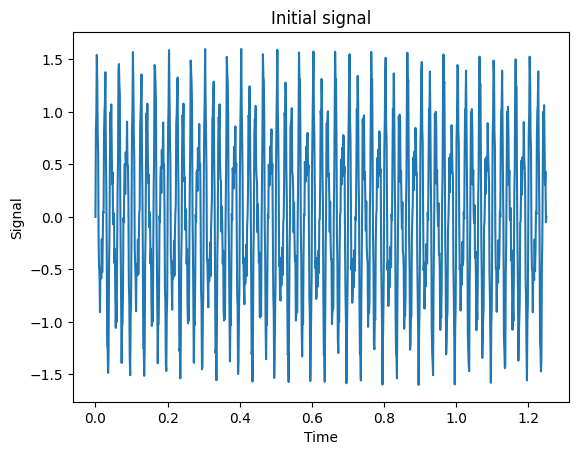

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


N = 1000
dt = 1.0 / 800.0
x = np.linspace(0.0, N*dt, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) + 0.2*np.sin(300.0 * 2.0*np.pi*x)
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Initial signal')

Text(0.5, 1.0, 'Discrete Fourier transform')

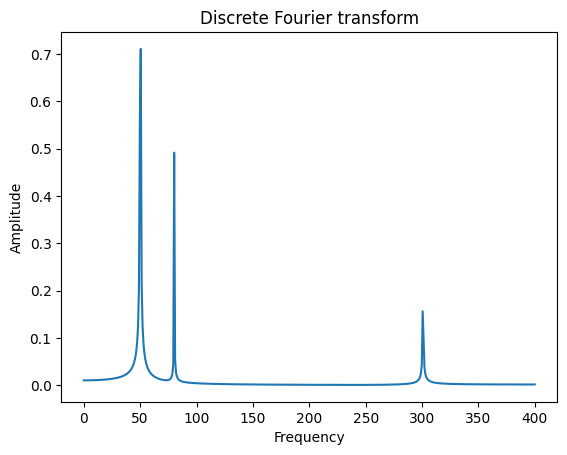

In [3]:
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*dt), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2])) #Note: N/2 to N will give negative frequencies
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Discrete Fourier transform')

## Fast Fourier transform (FFT)
Here we consider a matrix interpretation of the standard [Cooley-Tukey algorithm (1965)](https://www.ams.org/journals/mcom/1965-19-090/S0025-5718-1965-0178586-1/S0025-5718-1965-0178586-1.pdf), which has underlying **divide and conquer** idea. Note that in packages more advanced versions are used.

- Let $n$ be a power of 2. 
- First of all we <font color='red'> permute the rows </font> of the Fourier matrix such that the first $n/2$ rows of the new matrix had row numbers <font color='red'>$1,3,5,\dots,n-1$</font> and the last $n/2$ rows had row numbers <font color='red'>$2,4,6\dots,n$</font>. 

- This permutation can be expressed in terms of multiplication by permutation matrix $P_n$:

$$
P_n =
\begin{pmatrix}
1 & 0 & 0 & 0 & \dots & 0 & 0 \\
0 & 0 & 1 & 0 &\dots & 0 & 0 \\
\vdots & & & & & & \vdots \\
0 & 0 & 0 & 0 &\dots & 1 & 0 \\
\hline
0 & 1 & 0 & 0 & \dots & 0 & 0 \\
0 & 0 & 0 & 1 &\dots & 0 & 0 \\
\vdots & & & & & & \vdots \\
0 & 0 & 0 & 0 &\dots & 0 & 1 
\end{pmatrix},
$$

Hence,

$$
P_n F_n =
\begin{pmatrix}
1 & 1 & 1 & \dots & 1 \\
1 & w^{2\cdot 1}_n & w^{2\cdot 2}_n & \dots & w^{2\cdot (n-1)}_n\\
1 & w^{4\cdot 1}_n & w^{4\cdot 2}_n & \dots & w^{4\cdot (n-1)}_n\\
\vdots & & & & \vdots\\
1 & w^{(n-2)\cdot 1}_n & w^{(n-2)\cdot 2}_n & \dots & w^{(n-2)\cdot (n-1)}_n\\
\hline
1 & w^{1\cdot 1}_n & w^{1\cdot 2}_n & \dots & w^{1\cdot (n-1)}_n\\
1 & w^{3\cdot 1}_n & w^{3\cdot 2}_n & \dots & w^{3\cdot (n-1)}_n\\           
\vdots & & & & \vdots\\
1 & w^{(n-1)\cdot 1}_n & w^{(n-1)\cdot 2}_n & \dots & w^{(n-1)\cdot (n-1)}_n\\
\end{pmatrix},
$$

Now let us imagine that we separated its columns and rows by two parts each of size $n/2$.

As a result we get <font color='red'>$2\times 2$ block matrix</font> that has the following form

$$
P_n F_n =
\begin{pmatrix}
\left\{w^{2kl}_n\right\} & \left\{w_n^{2k\left(\frac{n}{2} + l\right)}\right\} \\
\left\{w_n^{(2k+1)l}\right\} & \left\{w_n^{(2k+1)\left(\frac{n}{2} + l\right)}\right\}
\end{pmatrix},
\quad k,l = 0,\dots, \frac{n}{2}-1.
$$

So far it does not look like something that works faster :) But we will see that in a minute.
Lets have a more precise look at the first block $\left\{w^{2kl}_n\right\}$:

$$
w^{2kl}_n = e^{-2kl\frac{2\pi i}{n}} = e^{-kl\frac{2\pi i}{n/2}} = w^{kl}_{n/2}.
$$

So this block is exactly twice smaller Fourier matrix $F_{n/2}$!

<!---
Now we can write

$$
\begin{pmatrix}
F_{n/2} & \left\{w_n^{2k\left(\frac{n}{2} + l\right)}\right\} \\
\left\{w_n^{(2k+1)l}\right\} & \left\{w_n^{(2k+1)\left(\frac{n}{2} + l\right)}\right\}
\end{pmatrix}
$$

-->
The block $\left\{w_n^{(2k+1)l}\right\}$ can be written as

$$
w_n^{(2k+1)l} = w_n^{2kl + l} = w_n^{l} w_n^{2kl} = w_n^{l} w_{n/2}^{kl},
$$

which can be written as $W_{n/2}F_{n/2}$, where 

$$W_{n/2} = \text{diag}(1,w_n,w_n^2,\dots,w_n^{n/2-1}).$$

Doing the same tricks for the other blocks we will finally get

$$
P_n F_n =
\begin{pmatrix}
F_{n/2} & F_{n/2} \\
F_{n/2}W_{n/2} & -F_{n/2}W_{n/2}
\end{pmatrix} =
\begin{pmatrix}
F_{n/2} & 0 \\
0 & F_{n/2}
\end{pmatrix}
\begin{pmatrix}
I_{n/2} & I_{n/2} \\
W_{n/2} & -W_{n/2}
\end{pmatrix}.
$$

- Thus, we <font color='red'>reduced multiplication by $F_n$ to 2 multiplications by $F_{n/2}$</font> and cheap multiplications by diagonal matrices. 
- If we apply the obtained expressions recursively to $F_{n/2}$, we will get <font color='red'>$\mathcal{O}(n\log n)$ </font> complexity.

In [4]:
#FFT vs full matvec
import time
import numpy as np
import scipy as sp
import scipy.linalg

n = 10000
F = sp.linalg.dft(n)
x = np.random.randn(n)

y_full = F.dot(x)

full_mv_time = %timeit -q -o F.dot(x)
print('Full matvec time =', full_mv_time.average)

y_fft = np.fft.fft(x)
fft_mv_time = %timeit -q -o np.fft.fft(x)
print('FFT time =', fft_mv_time.average)

print('Relative error =', (np.linalg.norm(y_full - y_fft)) / np.linalg.norm(y_full))

Full matvec time = 0.016554963692857142
FFT time = 6.18095107428571e-05
Relative error = 1.5329028805883414e-12


## Circulant matrices

FFT helps to multiply fast by certain types of matrices. We start from a circulant matrix:

$$
C =
\begin{pmatrix} 
c_0 & c_{n-1} & c_{n-2} & \dots & c_1 \\
c_{1} & c_{0} & c_{n-1} & \dots & c_2 \\
c_{2} & c_{1} & c_0 & \dots & c_3 \\
\dots & \dots & \dots & \dots & \dots \\
c_{n-1} & c_{n-2} & c_{n-3} & \dots & c_0
\end{pmatrix}
$$

**Theorem.** 
Let $C$ be a circulant matrix of size $n\times n$ and let $c$ be it's first column , then

$$
C = \frac{1}{n} F_n^* \text{diag}(F_n c) F_n 
$$

*Proof.* 
- Consider a number 

$$\lambda (\omega) = c_0 + \omega c_1 + \dots + \omega^{n-1} c_{n-1},$$ 

where $\omega$ is any number such that $\omega^n=1$. 
- Lets multiply $\lambda$ by $1,\omega,\dots, \omega^{n-1}$:

$$
\begin{split}
\lambda & = c_0 &+& \omega c_1 &+& \dots &+& \omega^{n-1} c_{n-1},\\
\lambda\omega & = c_{n-1} &+& \omega c_0 &+& \dots &+& \omega^{n-1} c_{n-2},\\
\lambda\omega^2 & = c_{n-2} &+& \omega c_{n-1} &+& \dots &+& \omega^{n-1} c_{n-3},\\
&\dots\\
\lambda\omega^{n-1} & = c_{1} &+& \omega c_{2} &+& \dots &+& \omega^{n-1} c_{0}.
\end{split}
$$

- Therefore,

$$
\lambda(\omega) \cdot \begin{pmatrix} 1&\omega & \dots& \omega^{n-1} \end{pmatrix} =
\begin{pmatrix} 1&\omega&\dots& \omega^{n-1} \end{pmatrix} \cdot C.
$$

- Writing this for $\omega = 1,w_n, \dots, w_n^{n-1}$ we get

$$
\Lambda F_n = F_n C
$$

and finally

$$
C = \frac{1}{n} F^*_n \Lambda F_n, \quad \text{where}\quad \Lambda = \text{diag}(F_nc) \qquad\blacksquare
$$

## Fast matvec with circulant matrix

- Representation $C = \frac{1}{n} F^* \text{diag}(F_n c) F_n $ gives us an explicit way to multiply a vector $x$ by $C$ in $\mathcal{O}(n\log n)$ operations. 
- Indeed,

$$
Cx = \frac{1}{n} F_n^* \text{diag}(F_n c) F_n x = \text{ifft}\left( \text{fft}(c) \circ \text{fft}(x)\right)
$$

where $\circ$ denotes elementwise product (Hadamard product) of two vectors (since $\text{diag}(a)b = a\circ b$) and ```ifft``` denotes inverse Fourier transform $F^{-1}_n$.

In [5]:
import numpy as np
import scipy as sp
import scipy.linalg

def circulant_matvec(c, x):
    return np.fft.ifft(np.fft.fft(c) * np.fft.fft(x))

n = 5000
c = np.random.random(n)
C = sp.linalg.circulant(c)
x = np.random.randn(n)


y_full = C.dot(x)
full_mv_time = %timeit -q -o C.dot(x)
print('Full matvec time =', full_mv_time.average)


y_fft = circulant_matvec(c, x)
fft_mv_time = %timeit -q -o circulant_matvec(c, x)
print('FFT time =', fft_mv_time.average)

print('Relative error =', (np.linalg.norm(y_full - y_fft)) / np.linalg.norm(y_full))

Full matvec time = 0.003428939464285707
FFT time = 0.0001001016214142856
Relative error = 1.307050346126901e-15


## Toeplitz matrices

Now we get back to Toeplitz matrices!

$$
T =
\begin{pmatrix} 
t_0 & t_{-1} & t_{-2} & t_{-3}& \dots & t_{1-n} \\
t_{1} & t_{0} & t_{-1} & t_{-2}& \dots & t_{2-n} \\
t_{2} & t_{1} & t_0 & t_{-1} &\dots & t_{3-n} \\
t_{3} & t_{2} & t_1 & t_0 & \dots & t_{4-n} \\
\dots & \dots & \dots & \dots & \dots & \dots\\
t_{n-1} & t_{n-2} & t_{n-3} & t_{n-4} &\dots &t_0
\end{pmatrix},
$$

or equivalently $T_{ij} = t_{i-j}$.

Matvec operation can be written as

$$
y_i = \sum_{j=1}^n t_{i-j} x_j,
$$

which can be interpreted as a discrete <font color='red'>convolution</font> of filter $t_i$ and signal $x_i$. 
For simplicity the size of the filter $t$ is such that the sizes of the input and output signals are the same. Generally, filter size can be arbitrary.

Fast convolution computation has a variety of applications, for instance, in signal processing or partial differential and integral equations. For instance, here is the smoothing of a signal:

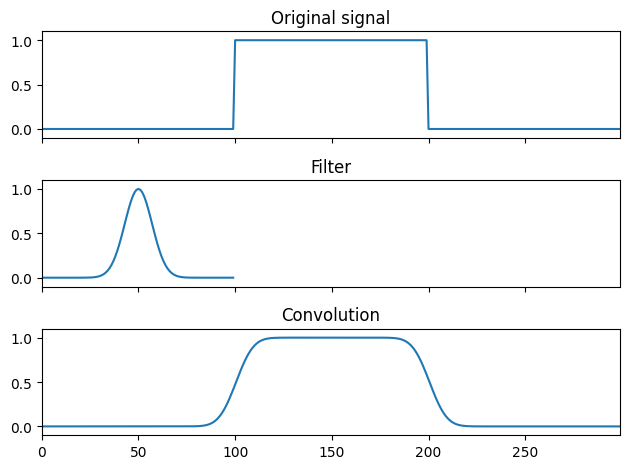

In [6]:
from scipy import signal
%matplotlib inline
import matplotlib.pyplot as plt

alpha = 0.01
sig = np.repeat([0., 1., 0.], 100)
filt = np.exp(-alpha * (np.arange(100)-50)**2)
filtered = signal.convolve(sig, filt, mode='same') / sum(filt)

fig, (ax_orig, ax_filt, ax_filtered) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.margins(0, 0.1)
ax_filt.plot(filt)
ax_filt.margins(0, 0.1)
ax_filtered.plot(filtered)
ax_filtered.margins(0, 0.1)

ax_orig.set_title('Original signal')
ax_filt.set_title('Filter')
ax_filtered.set_title('Convolution')

fig.tight_layout()

## Fast matvec with Toeplitz matrix

**Key point**: the multiplication by a Toeplitz matrix can be reduced to the multiplication by a circulant.

- Indeed, every Toeplitz matrix of size $n\times n$ can be embedded into a Circulant matrix $C$ of size $(2n - 1) \times (2n - 1)$:

$$
C = 
\begin{pmatrix}
T & \dots \\
\dots & \dots
\end{pmatrix}.
$$

- The $3\times 3$ matrix $T = \begin{pmatrix} 
t_0 & t_{-1} & t_{-2} \\
t_{1} & t_{0} & t_{-1} \\
t_{2} & t_{1} & t_0 \\
\end{pmatrix}$ 
can be embedded as follows

$$
C = 
\begin{pmatrix} 
t_0 & t_{-1} & t_{-2} & t_{2} & t_{1}\\
t_{1} & t_{0} & t_{-1} & t_{-2} & t_{2} \\
t_{2} & t_{1} & t_0 & t_{-1} & t_{-2} \\
t_{-2}& t_{2} & t_{1} & t_0 & t_{-1}  \\
t_{-1} & t_{-2} & t_{2} & t_{1} & t_0  
\end{pmatrix}.
$$

- For matvec 
$ \begin{pmatrix} y_1 \\ y_2 \\ y_3 \end{pmatrix}=
\begin{pmatrix} 
t_0 & t_{-1} & t_{-2} \\
t_{1} & t_{0} & t_{-1} \\
t_{2} & t_{1} & t_0 \\
\end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix}$
we pad vector $x$ with zeros:

$$
\begin{pmatrix} y_1 \\ y_2 \\ y_3 \\ \star \\ \star \end{pmatrix} =
\begin{pmatrix} 
t_0 & t_{-1} & t_{-2} & t_{2} & t_{1}\\
t_{1} & t_{0} & t_{-1} & t_{-2} & t_{2} \\
t_{2} & t_{1} & t_0 & t_{-1} & t_{-2} \\
t_{-2}& t_{2} & t_{1} & t_0 & t_{-1}  \\
t_{-1} & t_{-2} & t_{2} & t_{1} & t_0  
\end{pmatrix}
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ 0 \\ 0 \end{pmatrix}=
\text{ifft}(\text{fft}(\begin{pmatrix} t_0 \\ t_{1} \\ t_{2} \\ t_{-2} \\ t_{-1} \end{pmatrix})\circ \text{fft}(\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ 0 \\ 0 \end{pmatrix})).
$$

- Note that you **do not need to form and store** the whole matrix $T$
- From the  Cooley-Tukey algorithm follows that the preferable size of circulant matrix is $2^k$ for some $k$. You can do it with zero padding of the appropriate size.  

## Multilevel Toeplitz matrices

The 2-dimensional convolution is defined as 

$$
y_{i_1i_2} = \sum_{j_1,j_2=1}^n t_{i_1-j_1, i_2-j_2} x_{j_1 j_2}.
$$

Note that $x$ and $y$ are 2-dimensional arrays and $T$ is 4-dimensional. 
To reduce this expression to matrix-by-vector product we have to reshape $x$ and $y$ into long vectors:

$$
\text{vec}(x) = 
\begin{pmatrix}
x_{11} \\ \vdots \\ x_{1n} \\ \hline \\ \vdots \\ \hline \\ x_{n1} \\ \vdots \\ x_{nn}
\end{pmatrix},
\quad
\text{vec}(y) = 
\begin{pmatrix}
y_{11} \\ \vdots \\ y_{1n} \\ \hline \\ \vdots \\ \hline \\ y_{n1} \\ \vdots \\ y_{nn}
\end{pmatrix}.
$$

In this case matrix $T$ is **block Toeplitz with Toeplitz blocks:** (BTTB)

$$
T = 
\begin{pmatrix} 
T_0 & T_{-1} & T_{-2} &  \dots & T_{1-n} \\
T_{1} & T_{0} & T_{-1} & \dots & T_{2-n} \\
T_{2} & T_{1} & T_0 & \dots & T_{3-n} \\
\dots & \dots & \dots &  \dots & \dots\\
T_{n-1} & T_{n-2} & T_{n-3}  &\dots &T_0
\end{pmatrix},
\quad \text{where} \quad
T_k = t_{k, i_2 - j_2}\quad  \text{are Toeplitz matrices}
$$

## Fast matvec with multilevel Toeplitz matrix

To get fast matvec we need to embed block Toeplitz matrix with Toeplitz blocks into the block circulant matrix with circulant blocks. The analog of
$$\begin{pmatrix} y_1 \\ y_2 \\ y_3 \\ \star \\ \star \end{pmatrix} =
\text{ifft}(\text{fft}(\begin{pmatrix} t_0 \\ t_{1} \\ t_{2} \\ t_{-2} \\ t_{-1} \end{pmatrix})\circ\text{fft}(\begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ 0 \\ 0 \end{pmatrix})).$$
will look like
$$ \begin{pmatrix} y_{11} & y_{12} & y_{13} & \star & \star \\ 
y_{21} & y_{22} & y_{23} & \star & \star \\  
y_{31} & y_{32} & y_{33} & \star & \star \\ 
\star & \star & \star & \star & \star \\  
\star & \star & \star & \star & \star \\  
\end{pmatrix} = \text{ifft2d}(\text{fft2d}(\begin{pmatrix} t_{0,0} & t_{1,0} & t_{2,0} & t_{-2,0} & t_{-1,0} \\ 
t_{0,1} & t_{1,1} & t_{2,1} & t_{-2,1} & t_{-1,1} \\  
t_{0,2} & t_{1,2} & t_{2,2} & t_{-2,2} & t_{-1,2} \\ 
t_{0,-2} & t_{1,-2} & t_{2,-2} & t_{-2,-2} & t_{-1,-2} \\ 
t_{0,-1} & t_{1,-1} & t_{2,-1} & t_{-2,-1} & t_{-1,-1}
\end{pmatrix}) \circ \text{fft2d}(\begin{pmatrix}x_{11} & x_{12} & x_{13} & 0 & 0 \\ 
x_{21} & x_{22} & x_{23} & 0 & 0 \\  
x_{31} & x_{32} & x_{33} & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 \\  
0 & 0 & 0 & 0 & 0 \\  
\end{pmatrix})),$$
where fft2d is 2-dimensional fft that consists of one-dimensional transforms, applied first to rows and and then to columns (or vice versa).

In [7]:
# Blurring and Sharpening Lena by convolution

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from scipy import misc
import imageio

filter_size = 5
filter_blur = np.ones((filter_size, filter_size)) / filter_size**2
lena = imageio.imread('./lena512.jpg')
#lena = misc.face()
#lena = lena[:, :, 0]
blurred = signal.convolve2d(lena, filter_blur, boundary='symm', mode='same')

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(lena[200:300, 200:300], cmap='gray')
ax[0, 0].set_title('Original Lena')
ax[0, 1].imshow(blurred[200:300, 200:300], cmap='gray')
ax[0, 1].set_title('Blurred Lena')
ax[1, 0].imshow((lena - blurred)[200:300, 200:300], cmap='gray')
ax[1, 0].set_title('Lena $-$ Blurred Lena')
ax[1, 1].imshow(((lena - blurred)*3 + blurred)[200:300, 200:300], cmap='gray')
ax[1, 1].set_title('$3\cdot$(Lena $-$ Blurred Lena) + Blurred Lena')
fig.tight_layout()

ModuleNotFoundError: No module named 'imageio'

## Solving linear systems with Toeplitz matrix

- Convolution is ok; but what about **deconvolution**, or solving linear systems with Toeplitz matrices?

$$T x = f.$$

- For the periodic case, where $T = C$ is circulant, 

we have the spectral theorem

$$C = \frac{1}{n}F^* \Lambda F, \quad C^{-1} = \frac{1}{n}F^* \Lambda^{-1} F,$$

but for a general Toeplitz matrices, it is not a trivial question.

## Iterative methods

- Not-a-bad recipe for Toeplitz linear system is to use **iterative method** (fast matvec is available).

- A good choice for a preconditioner is a **circulant matrix**.

## Circulant preconditioner

- A natural idea is to use **circulants** as preconditioners, since they are easy to invert.

- The first preconditioner was the preconditioner by **Raymond Chan and Gilbert Strang**, who proposed to take the first column of the matrix and use it to generate the circulant.

- The second preconditioner is the **Tony Chan** preconditioner, which is also very natural: 

$$C = \arg \min_P \Vert P - T \Vert_F.$$

- A simple formula for the entries of $C$ can be derived.

In [ ]:
import numpy as np
import scipy.linalg
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp

n = 100
c = np.zeros(n)
c[0] = -2
c[1] = 1
Tm = sp.linalg.toeplitz(c, c)


c1 = sp.linalg.circulant(c) #Strang preconditioner
Fmat = 1.0/np.sqrt(n) * np.fft.fft(np.eye(n)) #Poor man's Fourier matrix

d2 = np.diag(Fmat.conj().dot(Tm).dot(Fmat))
c2 = Fmat.dot(np.diag(d2)).dot(Fmat.conj().T)


mat = np.linalg.inv(c1).dot(Tm)
ev = np.linalg.eigvals(mat).real
plt.plot(np.sort(ev), np.ones(n), 'o')
plt.xlabel('Eigenvalues for Strang preconditioner')
plt.gca().get_yaxis().set_visible(False)

mat = np.linalg.inv(c2).dot(Tm)
ev = np.linalg.eigvals(mat).real
plt.figure()
plt.plot(np.sort(ev), np.ones(n), 'o')
plt.xlabel('Eigenvalues for T. Chan Preconditioner')
plt.gca().get_yaxis().set_visible(False)


## Convolutions in neural networks

- The revolution in deep learning and computer vision is related to using Convolutional Neural Networks (CNN)
- The most famous examples are 
    - [AlexNet](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf), 2012
    - [GoogLeNet](https://arxiv.org/pdf/1409.4842.pdf), 2014
    - [VGG](https://www.robots.ox.ac.uk/~vgg/publications/2015/Simonyan15/simonyan15.pdf), 2015
- Further improvements are based on more advanced tricks like normalizations, skip connections and so on
- More details will be presented in Deep learning/computer vision courses

## What is convolution in NN?

- In neural networks the convolution means not convolution but **cross-correlation**!

$$ (x \star y)(t) = \int_{-\infty}^{+\infty} x(\tau)y(\tau + t)d \tau $$

- Compare with the definition of convolution from the first slide

$$(x * y)(t) = \int_{-\infty}^{+\infty} x(\tau) y(t -  \tau) d \tau.$$

<img width=400 src="./cross_correlation.svg">

Source is [here](https://en.wikipedia.org/wiki/Cross-correlation)

- Convolution and cross-correlation are related as 

$$ x(t) \star y(t) = x(-t) * y(t) $$ 

- How this operation is performed in neural networks?

<img src="./conv_nn.gif">

Source of gif is [here](https://towardsdatascience.com/covolutional-neural-network-cb0883dd6529)

- Also nice presentation about the difference of this operations, detailed comparison and PyTorch examples is [here](https://engineering.purdue.edu/DeepLearn/pdf-kak/week6.pdf)

## Additional remarks about this operation

- This operation reflects the relations between the neighbour pixels in image
- Multiple filters/kernels can fit different features of the image
- This is still **linear** transformation of the input, but it focus on local properties of data
- It can be efficiently computed with GPU since the single set of simple instructions have to be applied to multiple data
- The trained parameters here are filters that is used to produce the output, for batch of 3D images (RGB) they are 4-dimensional tensors

## How the trained filters and result image representation looks like

In [ ]:
import torchvision.models as models

vgg16 = models.vgg16(pretrained=True)
print(vgg16)

In [ ]:
for ch in vgg16.children():
    features = ch
    break
print(features)
for name, param in features.named_parameters(): 
    print(name, param.shape)

In [ ]:
plt.figure(figsize=(20, 17))
for i, filter in enumerate(features[2].weight):
    plt.subplot(16, 16, i+1)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
from PIL import Image
img = Image.open("./tiger.jpeg")
plt.imshow(img)
plt.show()

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

img_ = transform(img)
img_ = img_.unsqueeze(0)
print(img_.size())
plt.imshow(img_[0].permute(1, 2, 0))

In [ ]:
# After the first convolutional layer
output1 = features[0](img_)
print(output1.size())
plt.figure(figsize=(20, 17))
for i, f_map in enumerate(output1[0]):
    plt.subplot(8, 8, i+1)
    plt.imshow(f_map.detach(), cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
# After the second convolutional layer
output2 = features[2](features[1](output1))
print(output2.size())
plt.figure(figsize=(20, 17))
for i, f_map in enumerate(output2[0]):
    plt.subplot(8, 8, i+1)
    plt.imshow(f_map.detach(), cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
output3 = features[5](features[4](features[3](output2)))
print(output3.size())
plt.figure(figsize=(20, 20))
for i, f_map in enumerate(output3[0]):
    if i + 1 == 65:
        break
    plt.subplot(8, 8, i+1)
    plt.imshow(f_map.detach(), cmap="gray")
    plt.axis('off')
plt.show()

## Image transformations

- Different filters highlight different features of the image
- Pooling operation reduces the spatial dimensions and further convolutional layer moves it to channels dimension
- After all ```feature``` block one gets 512 channels (we start from 3 (RGB)) and significant reduction of the spatial size of image
- Such operation extracts useful features to help classifier work better
- Exactly this property of VGG-type networks is one of the ingredients of style transfer networks, see more details [here](https://medium.com/@mirzezadeh.elvin/neural-style-transfer-with-deep-vgg-model-26b11ea06b7e)

## Low-rank and Fourier transform

Recent achievements for learning structured matrices include [Monarch matrices] (https://arxiv.org/pdf/2204.00595.pdf) and here [Monarch mixer](https://arxiv.org/pdf/2310.12109.pdf)

Monarch matrix is given as

$$\mathbf{M}=\left(\prod_{i=1}^p \mathbf{P}_i \mathbf{B}_i\right) \mathbf{P}_0$$

where each $\mathbf{P}_i$ is related to the 'base $\sqrt[p]{N}$ ' variant of the bit-reversal permutation, and $\mathbf{B}_i$ is a block-diagonal matrix with block size $b$. Setting $b=\sqrt[p]{N}$ achieves sub-quadratic compute cost. For example, for $p=2, b=\sqrt{N}$, Monarch matrices require $O\left(N^{3 / 2}\right)$ compute in sequence length $N$.


## Low-rank characteristic of Monarch matrices

If we treat Monarch matrix as a block matrix with $m \times m$ block, the elements have the form:

$$M_{\ell j k i}=L_{j \ell k} R_{k j i}$$

This is rank-1 approximation in disguise.

## Small demo

In [13]:
import numpy as np
import matplotlib.pyplot as plt
n = 1024

f = np.fft.fft(np.eye(n))


print('Rectangular block, approximate low rank')
print(np.linalg.svd(f[:16, :n//16])[1])

print('Special low-rank submatrices, exact low-rank')
m1 = f[::16, ::n//16]
print(m1.shape)
print(np.linalg.svd(m1)[1])


## Take home message

- Toeplitz and circulant matrices
- Spectral theorem
- FFT
- Multilevel Toeplitz matrices
- Intro to convolutional neural networks

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

FileNotFoundError: [Errno 2] No such file or directory: './styles/custom.css'